In [1]:
#== Define segmenter, read images, and perform segmentation ==%

# import relevant packages
import os
from glob import glob

import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib

from deployment import Segmenter


def demo():
    # Gather paths of images to be segmented.
    data_dir = os.path.join("tests/")
    image_paths = glob(os.path.join(data_dir, "*.*"))
    
    print(image_paths)

    # When segmenting many images, it may be advisable to use a GPU.
    device = "cuda"

    # Perform the segmentation.
    masks = iterateSegmentation(image_paths, device)
    
    return masks,image_paths


# iterative segmentation function
def iterateSegmentation(image_paths, device="cpu"):

    # Create a Segmenter object.
    segmenter = Segmenter(device=device)

    # Create an empty list to store the masks.
    masks = []
    # Iterate the image paths.
    for image_path in tqdm(image_paths):
        # Load an image and convert it to an RGB array.
        image = np.asarray(Image.open(image_path).convert("RGB"))

        # Segment the image.
        mask = segmenter.segment_image(image)

        # Store the mask in the list of masks.
        masks.append(mask)
        
    return masks


if __name__ == "__main__":
    masks,image_paths = demo()
    
print('Complete.')

['tests\\20180529_A9_003.TIF', 'tests\\20180529_A9_011.TIF', 'tests\\201805A_A6_004.TIF', 'tests\\Case1_E7_025.TIF', 'tests\\Case4_D8_007.TIF', 'tests\\RU_FI_A10_004.TIF', 'tests\\test_image.png']


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

Complete.


Sample segmented images:


<Figure size 432x288 with 0 Axes>

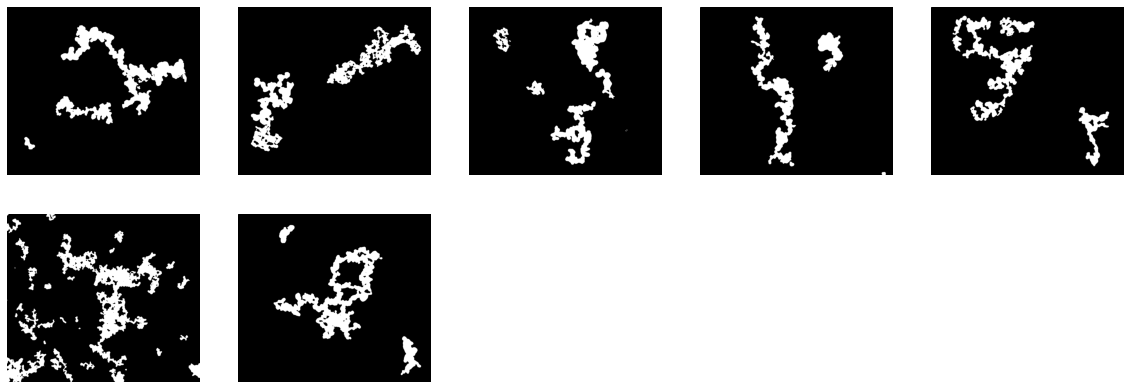

In [2]:
#== Show segmented binary images ==%
print('Sample segmented images:')

# function to loop through and load images
def vizBinaries(masks):
    matplotlib.pyplot.gray() # apply grayscale colormap
    no_masks = len(masks)
    no_col = np.minimum(no_masks, 5)
    no_row = int(np.ceil(no_masks / no_col))
    fig, axs = matplotlib.pyplot.subplots(no_row, no_col, figsize=(20, 3.5*no_row))
    
    ii = 0 # column
    jj = 0 # row
    for mask in masks:
        axs[jj,ii].axis('off')
        axs[jj,ii].imshow(mask)
        ii = ii + 1
        if ii==no_col:
            ii = 0
            jj = jj + 1
    
    # for remaining panels, remove axes
    while (ii*jj) <= ((no_col-1)*(no_row-1)):
        axs[jj,ii].axis('off')
        ii = ii + 1
    

vizBinaries(masks) # run above function

In [3]:
#== Ouput binary images by saving to the results folder ==#
import ntpath # import an extra package used to get file names

ii = 0
for image_path in tqdm(image_paths):
    _, tail = ntpath.split(image_path)
    matplotlib.image.imsave('results/' + tail, masks[ii], format='tiff')
    ii = ii+1

print('Images saved to results/ folder.')

100%|██████████| 7/7 [00:01<00:00,  5.05it/s]

Images saved to results/ folder.
